
# TP : Implémentation de la logique floue avec Scikit-Fuzzy

Dans ce TP, nous allons utiliser la bibliothèque **Scikit-Fuzzy** pour implémenter des systèmes de logique floue.

Les trois parties sont :
1. **Introduction et création de la variable floue Température**
2. **Système flou pour le contrôle de la température**
3. **Exploitation avancée : ajustement de la vitesse d'un véhicule en fonction de la distance et de la visibilité**

---



## Partie 1 : Introduction et création de la variable floue Température

### Objectifs
1. Installer Scikit-Fuzzy.
2. Créer une variable floue **Température** avec les états linguistiques : "Froid", "Moyen", et "Chaud".
3. Visualiser les fonctions d'appartenance.

### Code


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


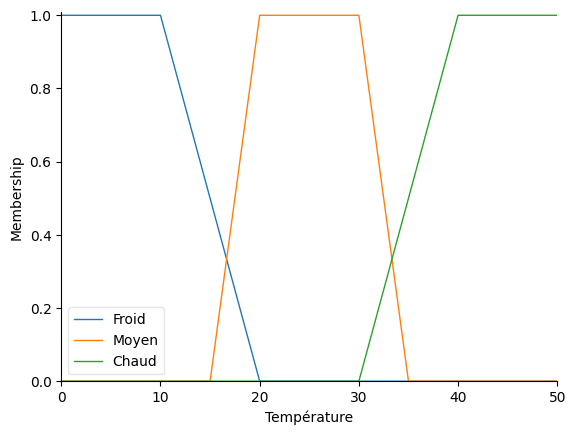

In [1]:

# Importation des bibliothèques nécessaires
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Création de la variable d'entrée "Température"
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'Température')

# Définition des fonctions d'appartenance pour "Température"
temperature['Froid'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['Moyen'] = fuzz.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['Chaud'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Visualisation des fonctions d'appartenance
temperature.view()



## Partie 2 : Système flou pour le contrôle de la température

### Objectifs
1. Créer une nouvelle variable floue **Chauffage** avec les états linguistiques : "Faible", "Moyenne", et "Forte".
2. Ajouter des fonctions d'appartenance à la variable Chauffage.
3. Implémenter des règles floues pour réguler la puissance du chauffage en fonction de la température.

### Code


Puissance du chauffage : 50.0%


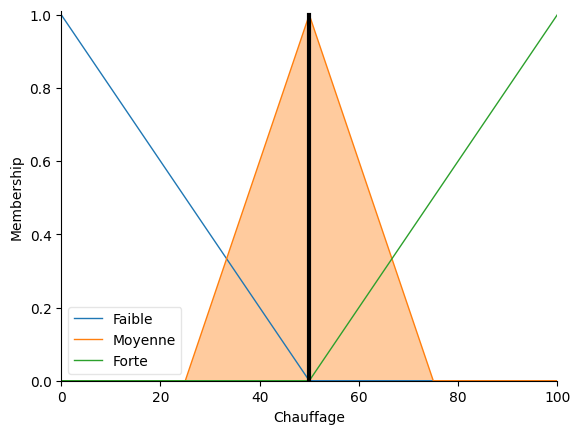

In [2]:

# Création de la variable de sortie "Chauffage"
chauffage = ctrl.Consequent(np.arange(0, 101, 1), 'Chauffage')

# Définition des fonctions d'appartenance pour "Chauffage"
chauffage['Faible'] = fuzz.trimf(chauffage.universe, [0, 0, 50])
chauffage['Moyenne'] = fuzz.trimf(chauffage.universe, [25, 50, 75])
chauffage['Forte'] = fuzz.trimf(chauffage.universe, [50, 100, 100])

# Définition des règles floues
rule1 = ctrl.Rule(temperature['Froid'], chauffage['Forte'])
rule2 = ctrl.Rule(temperature['Moyen'], chauffage['Moyenne'])
rule3 = ctrl.Rule(temperature['Chaud'], chauffage['Faible'])

# Création du système de contrôle
chauffage_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
chauffage_simulation = ctrl.ControlSystemSimulation(chauffage_ctrl)

# Définir une valeur d'entrée pour la simulation
chauffage_simulation.input['Température'] = 25

# Calcul de la sortie
chauffage_simulation.compute()

# Affichage du résultat
print(f"Puissance du chauffage : {chauffage_simulation.output['Chauffage']}%")
chauffage.view(sim=chauffage_simulation)



## Partie 3 : Exploitation avancée - Contrôle de la vitesse d'un véhicule

### Objectifs
1. Créer les variables d'entrée **Distance** et **Visibilité**, et la variable de sortie **Vitesse**.
2. Définir les fonctions d'appartenance pour chaque variable.
3. Établir des règles floues pour contrôler la vitesse en fonction de la distance et de la visibilité.
4. Simuler plusieurs scénarios avec différentes valeurs de distance et de visibilité.

### Code


Scénario 1: Distance = 30, Visibilité = 20
Vitesse recommandée : 18.571428571428573%

Scénario 2: Distance = 30, Visibilité = 70
Vitesse recommandée : 50.00000000000004%

Scénario 3: Distance = 70, Visibilité = 40
Vitesse recommandée : 58.39506172839516%

Scénario 4: Distance = 90, Visibilité = 80
Vitesse recommandée : 81.42857142857139%



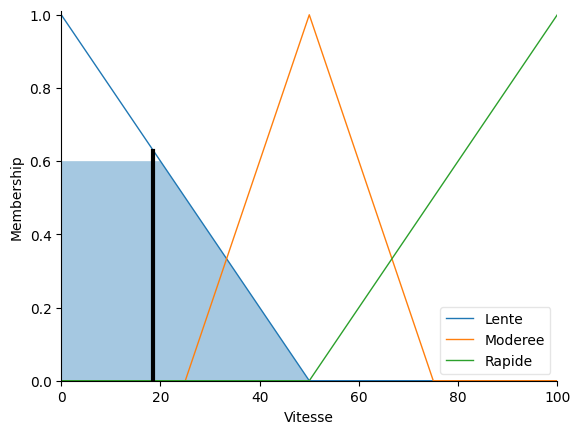

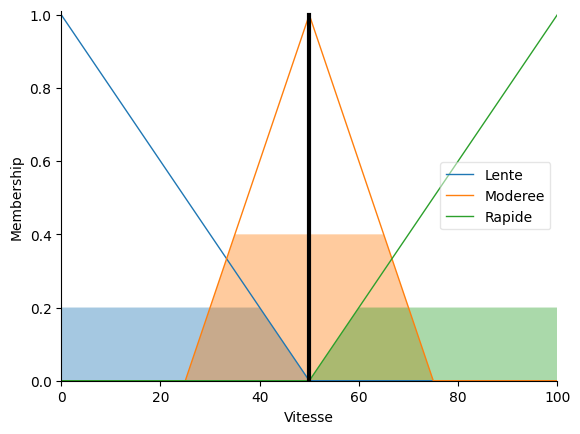

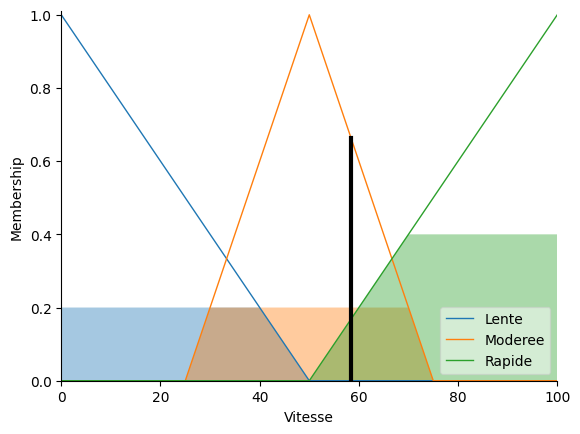

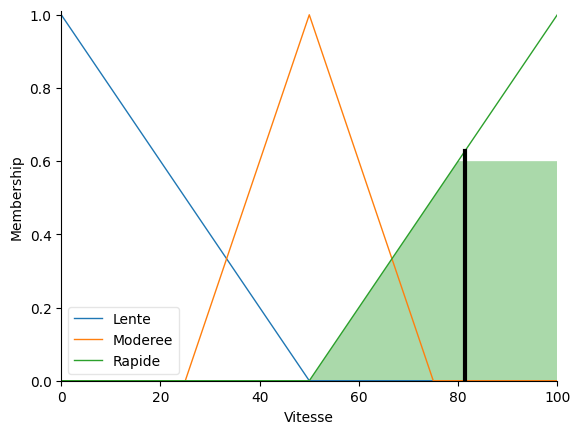

In [3]:

# Création des variables d'entrée "Distance" et "Visibilité"
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'Distance')
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'Visibilité')

# Création de la variable de sortie "Vitesse"
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'Vitesse')

# Définition des fonctions d'appartenance pour "Distance"
distance['Proche'] = fuzz.trimf(distance.universe, [0, 0, 50])
distance['Moyenne'] = fuzz.trimf(distance.universe, [25, 50, 75])
distance['Loin'] = fuzz.trimf(distance.universe, [50, 100, 100])

# Définition des fonctions d'appartenance pour "Visibilité"
visibilite['Faible'] = fuzz.trimf(visibilite.universe, [0, 0, 50])
visibilite['Moyenne'] = fuzz.trimf(visibilite.universe, [25, 50, 75])
visibilite['Bonne'] = fuzz.trimf(visibilite.universe, [50, 100, 100])

# Définition des fonctions d'appartenance pour "Vitesse"
vitesse['Lente'] = fuzz.trimf(vitesse.universe, [0, 0, 50])
vitesse['Moderee'] = fuzz.trimf(vitesse.universe, [25, 50, 75])
vitesse['Rapide'] = fuzz.trimf(vitesse.universe, [50, 100, 100])

# Définition des règles floues
rule1 = ctrl.Rule(distance['Proche'] & visibilite['Faible'], vitesse['Lente'])
rule2 = ctrl.Rule(distance['Proche'] & visibilite['Moyenne'], vitesse['Lente'])
rule3 = ctrl.Rule(distance['Proche'] & visibilite['Bonne'], vitesse['Moderee'])
rule4 = ctrl.Rule(distance['Moyenne'] & visibilite['Faible'], vitesse['Lente'])
rule5 = ctrl.Rule(distance['Moyenne'] & visibilite['Moyenne'], vitesse['Moderee'])
rule6 = ctrl.Rule(distance['Moyenne'] & visibilite['Bonne'], vitesse['Rapide'])
rule7 = ctrl.Rule(distance['Loin'] & visibilite['Faible'], vitesse['Moderee'])
rule8 = ctrl.Rule(distance['Loin'] & visibilite['Moyenne'], vitesse['Rapide'])
rule9 = ctrl.Rule(distance['Loin'] & visibilite['Bonne'], vitesse['Rapide'])
rule10 = ctrl.Rule(visibilite['Faible'], vitesse['Lente'])  # Règle de "sécurité"

# Création du système de contrôle
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
vitesse_simulation = ctrl.ControlSystemSimulation(vitesse_ctrl)

# Simulations de plusieurs scénarios
scenarios = [
    {'Distance': 30, 'Visibilité': 20},
    {'Distance': 30, 'Visibilité': 70},
    {'Distance': 70, 'Visibilité': 40},
    {'Distance': 90, 'Visibilité': 80}
]

for i, scenario in enumerate(scenarios, 1):
    vitesse_simulation.input['Distance'] = scenario['Distance']
    vitesse_simulation.input['Visibilité'] = scenario['Visibilité']
    vitesse_simulation.compute()
    print(f"Scénario {i}: Distance = {scenario['Distance']}, Visibilité = {scenario['Visibilité']}")
    print(f"Vitesse recommandée : {vitesse_simulation.output['Vitesse']}%\n")
    vitesse.view(sim=vitesse_simulation)
